In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
data=pd.read_csv("A:\Dataset\Titanic-Dataset.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_7652\398330515.py:1: SyntaxWarning: invalid escape sequence '\D'
  data=pd.read_csv("A:\Dataset\Titanic-Dataset.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data['Age'].fillna(data['Age'].median(skipna=True),inplace=True)

C:\Users\astik\AppData\Local\Temp\ipykernel_7652\4098876312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(skipna=True),inplace=True)


In [13]:
data.drop(['Cabin'],axis=1,inplace=True)
data.drop(['Embarked'],axis=1,inplace=True)

In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [23]:
data.drop(['Name','Sex','Ticket'],axis=1,inplace=True)

In [29]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [31]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [37]:
rfr=RandomForestRegressor(n_estimators=100,random_state=0)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [39]:
print(X_train)

[[ 1.59014094  1.25474307 -1.5325562   1.64654836 -0.457246   -0.47299765]
 [-1.52952238  1.25474307 -1.5325562   1.4930717   0.4033711  -0.47299765]
 [-0.23515275 -0.79697591  0.84844757 -2.19036814  3.8458395   1.93253327]
 ...
 [ 0.70655928 -0.79697591  0.84844757 -0.11843323 -0.457246   -0.47299765]
 [ 0.43528421  1.25474307  0.84844757  0.49547341  0.4033711  -0.47299765]
 [ 0.91970398 -0.79697591 -0.34205431  2.33719333  0.4033711   0.72976781]]


In [41]:
print(X_test)

[[ 0.21119888 -0.77151675  0.77963055 -0.0724674  -0.53120385 -0.47809977]
 [ 0.8106727  -0.77151675  0.77963055 -0.0724674  -0.53120385 -0.47809977]
 [-0.63903523 -0.77151675  0.77963055 -1.69302814  3.68694819  0.87064484]
 ...
 [ 0.70096507 -0.77151675  0.77963055 -0.14963696  0.52333416 -0.47809977]
 [ 1.35137458  1.29614814  0.77963055 -0.84416299 -0.53120385 -0.47809977]
 [-1.47751496 -0.77151675 -1.64991582 -0.0724674  -0.53120385 -0.47809977]]


In [43]:
y_pred

array([  9.629804,  10.258695,  44.982292,  62.751625,  19.693118,
        70.333802,  39.113   , 120.484962,  67.555752,   7.96471 ,
        13.30079 ,  13.4345  ,  10.410489,  24.333838,  72.747511,
        10.094506,   8.219673,  27.126123,   7.650572,  13.527502,
        22.785038, 130.72551 ,  10.438122,  39.86187 ,   8.168104,
       105.206587,   7.921926,   7.565678,  24.570962,  33.097628,
         7.869461,  11.907959,  11.362906,  59.47288 ,  19.284943,
        43.480875,  23.845238,   8.753625,  14.67575 ,  15.4045  ,
       109.587829,   7.899509,  10.075053,  46.033917,  86.336831,
         7.907408,  10.228283, 156.77946 ,  12.495   ,  95.27963 ,
       118.885668, 172.672901,  24.184834,  10.567508,  57.889712,
        56.623874,  52.229698,  46.137167,  31.34025 ,  18.808084,
         9.046501,  18.572246,  77.743767,  50.674161,  19.10887 ,
         7.946774,  51.087211,  23.448837,  23.243959,  36.607546,
        24.879325, 122.455969,  59.411917,   8.856339,   8.432

In [45]:
y_test

array([ 14.4583,   7.55  ,  29.125 , 146.5208,  15.2458,  30.5   ,
       153.4625, 164.8667,  91.0792,   7.2292,   7.8542,  13.    ,
         7.75  ,  26.25  ,  83.1583,   7.8542,   9.225 ,  36.75  ,
         8.05  ,   8.5167,  11.5   , 151.55  ,   7.7375,  31.    ,
         9.8375, 134.5   ,   7.8958,   7.75  ,  26.    ,  27.9   ,
         8.6625,  10.5   ,   9.5   ,  35.5   ,   7.0458,  30.5   ,
         6.45  ,  10.5   ,  13.    ,  14.    ,  79.2   ,   7.225 ,
        14.5   ,  39.6875,  83.475 ,   7.8958,   7.8958, 262.375 ,
        13.    ,  79.65  ,  30.    ,  63.3583,  23.    ,   7.8958,
        29.7   ,  73.5   ,  26.55  ,  31.275 ,  27.9   ,  23.25  ,
         7.2292,  21.075 ,  78.2667,  39.6   ,  11.1333,   7.75  ,
        25.9292,  33.    ,  26.    ,  30.    ,  26.    ,  52.    ,
        82.1708,   8.05  ,   8.05  ,  21.    , 263.    ,  27.7208,
         6.4958,  15.05  ,  24.15  ,  15.9   ,  26.    ,   7.775 ,
        26.    ,  77.9583, 227.525 ,   9.5875,  10.5   , 108.9

In [47]:
print('Train MAE:',mean_absolute_error(y_train,rfr.predict(X_train)))
print('Train RSME:',np.sqrt(mean_squared_error(y_train,rfr.predict(X_train))))
print('R Square:',r2_score(y_train,rfr.predict(X_train)))

Train MAE: 5.501457317817015
Train RSME: 13.893332208790714
R Square: 0.9169809011075397


In [49]:
print('Train MAE:',mean_absolute_error(y_test,rfr.predict(X_test)))
print('Train RSME:',np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))
print('R Square:',r2_score(y_test,rfr.predict(X_test)))

Train MAE: 13.896978828358208
Train RSME: 37.47909565163143
R Square: 0.49749091296830295


In [52]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: xlabel='Survived', ylabel='Age'>

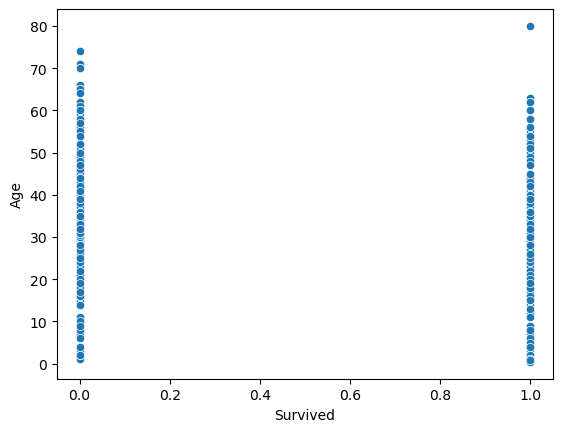

In [54]:
import seaborn as sns
sns.scatterplot(x='Survived',y='Age',data=data)

<Axes: xlabel='Survived', ylabel='Age'>

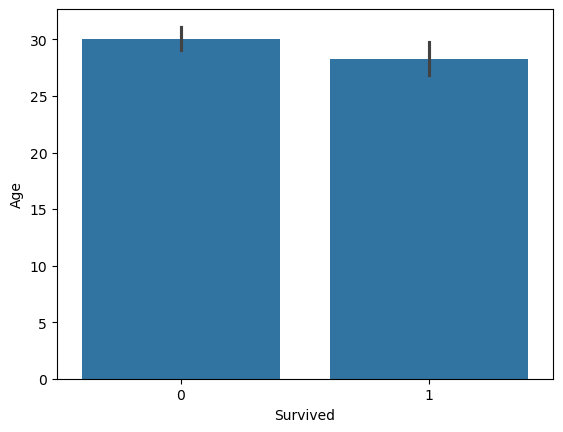

In [56]:
sns.barplot(x='Survived',y='Age',data=data)